In [52]:
from PIL import Image, ImageDraw, ImageFont

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches

import datetime
import os
from pathlib import Path
import subprocess


In [53]:
#設定值
start = datetime.datetime(2017, 6, 19, 4, 0, 0)
dateDay = start 
#deltatime = 5 #every 5 minutes
time = 1
delta = datetime.timedelta(minutes = time)
#檔案路徑
path = "/media/shawn-pc/HD-PNFU3/Camera2/"
localPath = '/home/shawn-pc/桌面/GDmontage/'

#裁切的左上角起始座標
x = 400
y = 0

#x = 300
#y = 280

#在圖片裡裁切的大小
#crop_w = 200
#crop_h = 300

crop_w = 60
crop_h = 90


#組圖的格子
columns= 31
rows = 12

#組圖裡的小圖尺寸
w = 60
h = 90
size = w, h  

#組圖的尺寸
montage_w = w * columns
montage_h = h * rows
print(montage_w,montage_h)


1860 1080


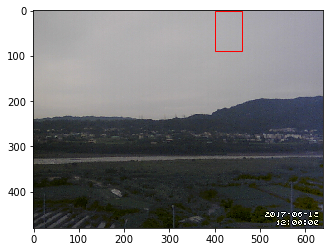

In [54]:
#取得起始日期的當天中午圖片
noonfile = path+start.strftime("%Y/%m/%d/12/12-00-00.jpg")

#繪製範例圖片加上紅框
img = Image.open(noonfile)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Create a Rectangle patch
rect = patches.Rectangle((x,y),crop_w,crop_h,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.savefig('sample.png')
plt.show()

In [55]:
#用PIL檢測圖片檔，如圖片錯誤則...

def is_jpg(filename):
    try:
        i=Image.open(filename)
        return i.format =='JPEG'
    except IOError:
        return False

In [56]:
#取得圖片，切割圖片，並縮小尺寸

def cutAndThumb(file):
    #裁切圖片
    img = Image.open(file)
    area = (x, y, x+crop_w, y+crop_h)
    cropped_img = img.crop(area)

    #做縮圖
    cropped_img.thumbnail(size,Image.ANTIALIAS)
    cropped_img=np.array(cropped_img)
    #print(cropped_img[2,3])

    #做白色外框，1像素
    new_im = np.zeros([h,w,3],dtype=np.uint8)
    new_im.fill(255)
    new_im[1:-1,1:-1]=cropped_img[1:-1,1:-1]
    return new_im


In [57]:
def montage365(date): #傳入起始日期和指定幾分的時間，傳出一個montage陣列
    #每隔一天抓一張圖
    i = 0
    #lists=[]  #圖片路徑存在lists
    tStart = datetime.datetime.now()

    #產生白底的組圖
    montage = np.zeros([montage_h,montage_w,3],dtype=np.uint8)
    montage.fill(255) # or img[:] = 255)

    for i in range(365):

        file = path+date.strftime("%Y/%m/%d/%H/%H-%M-%S.jpg")
        #lists.append(file)

        if is_jpg(file):
            m= int(float(date.strftime("%m"))) -1
            n= int(float(date.strftime("%d"))) -1       
            montage[m*h:(m+1)*h,n*w:(n+1)*w]=cutAndThumb(file)


        #print(i*100/365)
        i=i+1

        date = date + datetime.timedelta(days = 1)

    tEnd = datetime.datetime.now()

    print("duration:  "+str(tEnd-tStart))
    img = Image.fromarray(montage, 'RGB')
    
"""在組圖上加時間戳記"""
    
    
    # text and font
    unicode_text = date.strftime('%H:%M')
    font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeMono.ttf", 28, encoding="unic")

    # get the line size
    text_width, text_height = font.getsize(unicode_text)

    #添加文字
    draw = ImageDraw.Draw(img)
    draw.text((28.5*w,1.5*h), unicode_text, 'black', font)

    
    img.save(date.strftime(localPath+'/%H-%M-%S.png'))
    print(date.strftime('%H-%M-%S done'))    
    
    
    #return montage
    #print(len(lists))
    #print(lists)


In [58]:
#從4點到19點，每隔1分鐘做一次
for i in range(60//time*(20-4)):  

    pic = montage365(dateDay)
    print("======")
    dateDay = dateDay + delta


duration:  0:00:24.930634
04-00-00 done
duration:  0:00:12.028909
04-01-00 done
duration:  0:00:12.380703
04-02-00 done
duration:  0:00:12.007523
04-03-00 done
duration:  0:00:12.385736
04-04-00 done
duration:  0:00:09.788548
04-05-00 done
duration:  0:00:09.996498
04-06-00 done
duration:  0:00:11.679232
04-07-00 done
duration:  0:00:11.921761
04-08-00 done
duration:  0:00:17.533126
04-09-00 done
duration:  0:00:11.755986
04-10-00 done
duration:  0:00:09.297422
04-11-00 done
duration:  0:00:09.568311
04-12-00 done
duration:  0:00:09.652111
04-13-00 done
duration:  0:00:09.848142
04-14-00 done
duration:  0:00:09.624543
04-15-00 done
duration:  0:00:09.827049
04-16-00 done
duration:  0:00:10.735407
04-17-00 done
duration:  0:00:16.742213
04-18-00 done
duration:  0:00:09.904736
04-19-00 done
duration:  0:00:09.867732
04-20-00 done
duration:  0:00:11.551054
04-21-00 done
duration:  0:00:11.502830
04-22-00 done
duration:  0:00:10.684023
04-23-00 done
duration:  0:00:09.838259
04-24-00 done


06-54-00 done
duration:  0:00:10.056052
06-55-00 done
duration:  0:00:11.822934
06-56-00 done
duration:  0:00:09.662231
06-57-00 done
duration:  0:00:09.596927
06-58-00 done
duration:  0:00:09.483846
06-59-00 done
duration:  0:00:19.629562
07-00-00 done
duration:  0:00:09.653065
07-01-00 done
duration:  0:00:09.807266
07-02-00 done
duration:  0:00:09.819778
07-03-00 done
duration:  0:00:09.656314
07-04-00 done
duration:  0:00:10.077528
07-05-00 done
duration:  0:00:09.878046
07-06-00 done
duration:  0:00:09.928292
07-07-00 done
duration:  0:00:09.837606
07-08-00 done
duration:  0:00:16.145708
07-09-00 done
duration:  0:00:10.056415
07-10-00 done
duration:  0:00:09.768977
07-11-00 done
duration:  0:00:09.806602
07-12-00 done
duration:  0:00:09.737453
07-13-00 done
duration:  0:00:09.620222
07-14-00 done
duration:  0:00:09.902113
07-15-00 done
duration:  0:00:10.042318
07-16-00 done
duration:  0:00:09.887959
07-17-00 done
duration:  0:00:16.692246
07-18-00 done
duration:  0:00:09.647667


duration:  0:00:10.176956
09-49-00 done
duration:  0:00:10.036338
09-50-00 done
duration:  0:00:10.066695
09-51-00 done
duration:  0:00:09.817310
09-52-00 done
duration:  0:00:10.863698
09-53-00 done
duration:  0:00:10.126614
09-54-00 done
duration:  0:00:10.164154
09-55-00 done
duration:  0:00:09.915873
09-56-00 done
duration:  0:00:09.917177
09-57-00 done
duration:  0:00:10.264503
09-58-00 done
duration:  0:00:09.895237
09-59-00 done
duration:  0:00:19.923649
10-00-00 done
duration:  0:00:10.055661
10-01-00 done
duration:  0:00:09.669173
10-02-00 done
duration:  0:00:09.868797
10-03-00 done
duration:  0:00:10.029322
10-04-00 done
duration:  0:00:10.060264
10-05-00 done
duration:  0:00:11.255050
10-06-00 done
duration:  0:00:09.920240
10-07-00 done
duration:  0:00:09.922411
10-08-00 done
duration:  0:00:15.972511
10-09-00 done
duration:  0:00:09.738692
10-10-00 done
duration:  0:00:09.621037
10-11-00 done
duration:  0:00:09.694564
10-12-00 done
duration:  0:00:10.230941
10-13-00 done


12-43-00 done
duration:  0:00:10.185903
12-44-00 done
duration:  0:00:16.373727
12-45-00 done
duration:  0:00:10.371380
12-46-00 done
duration:  0:00:10.027668
12-47-00 done
duration:  0:00:10.021678
12-48-00 done
duration:  0:00:09.790858
12-49-00 done
duration:  0:00:10.324537
12-50-00 done
duration:  0:00:10.151694
12-51-00 done
duration:  0:00:09.788555
12-52-00 done
duration:  0:00:10.605458
12-53-00 done
duration:  0:00:09.867478
12-54-00 done
duration:  0:00:10.027523
12-55-00 done
duration:  0:00:09.929659
12-56-00 done
duration:  0:00:10.179214
12-57-00 done
duration:  0:00:09.912551
12-58-00 done
duration:  0:00:10.710450
12-59-00 done
duration:  0:00:19.940968
13-00-00 done
duration:  0:00:10.634702
13-01-00 done
duration:  0:00:10.024132
13-02-00 done
duration:  0:00:10.208526
13-03-00 done
duration:  0:00:10.164448
13-04-00 done
duration:  0:00:10.243490
13-05-00 done
duration:  0:00:09.684146
13-06-00 done
duration:  0:00:10.032015
13-07-00 done
duration:  0:00:10.394410


duration:  0:00:09.745327
15-38-00 done
duration:  0:00:09.724363
15-39-00 done
duration:  0:00:09.996743
15-40-00 done
duration:  0:00:09.869378
15-41-00 done
duration:  0:00:09.874213
15-42-00 done
duration:  0:00:10.240439
15-43-00 done
duration:  0:00:09.875985
15-44-00 done
duration:  0:00:16.020492
15-45-00 done
duration:  0:00:10.081160
15-46-00 done
duration:  0:00:09.681385
15-47-00 done
duration:  0:00:10.018616
15-48-00 done
duration:  0:00:09.728556
15-49-00 done
duration:  0:00:10.390837
15-50-00 done
duration:  0:00:09.911612
15-51-00 done
duration:  0:00:09.656405
15-52-00 done
duration:  0:00:09.509667
15-53-00 done
duration:  0:00:09.974815
15-54-00 done
duration:  0:00:09.978611
15-55-00 done
duration:  0:00:09.667828
15-56-00 done
duration:  0:00:09.818735
15-57-00 done
duration:  0:00:10.074674
15-58-00 done
duration:  0:00:10.125283
15-59-00 done
duration:  0:00:20.176926
16-00-00 done
duration:  0:00:09.766949
16-01-00 done
duration:  0:00:09.694172
16-02-00 done


18-32-00 done
duration:  0:00:09.951871
18-33-00 done
duration:  0:00:09.890036
18-34-00 done
duration:  0:00:09.405769
18-35-00 done
duration:  0:00:16.132660
18-36-00 done
duration:  0:00:09.552279
18-37-00 done
duration:  0:00:09.439792
18-38-00 done
duration:  0:00:09.516832
18-39-00 done
duration:  0:00:09.480941
18-40-00 done
duration:  0:00:09.149600
18-41-00 done
duration:  0:00:09.534098
18-42-00 done
duration:  0:00:09.473729
18-43-00 done
duration:  0:00:09.561007
18-44-00 done
duration:  0:00:09.892505
18-45-00 done
duration:  0:00:09.656470
18-46-00 done
duration:  0:00:09.554366
18-47-00 done
duration:  0:00:09.589838
18-48-00 done
duration:  0:00:09.505425
18-49-00 done
duration:  0:00:09.631576
18-50-00 done
duration:  0:00:09.515059
18-51-00 done
duration:  0:00:09.582505
18-52-00 done
duration:  0:00:09.726710
18-53-00 done
duration:  0:00:09.531534
18-54-00 done
duration:  0:00:09.645927
18-55-00 done
duration:  0:00:09.257835
18-56-00 done
duration:  0:00:09.199337


In [59]:
#montage的圖片轉影片mp4
strcmd = "ffmpeg -pattern_type glob -i '"+localPath+"*.png' " + "-y "+localPath +"montageTimelapse.mp4"
#print(strcmd)
subprocess.call(strcmd, shell=True)
print("mp4 done")

mp4 done


In [26]:
#繪製X座標軸刻度

xticks_old=np.arange(1,32,1) 
xticks_new=np.arange(1,32,1) 


xticks_old = xticks_old * np.array([w])
xticks_old = xticks_old - np.array([w/2])
print(xticks_old)
print(xticks_new)

[   30.    90.   150.   210.   270.   330.   390.   450.   510.   570.
   630.   690.   750.   810.   870.   930.   990.  1050.  1110.  1170.
  1230.  1290.  1350.  1410.  1470.  1530.  1590.  1650.  1710.  1770.
  1830.]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31]


In [27]:
#繪製Y座標軸刻度
yticks_old=np.arange(1,13,1) 
yticks_new=np.arange(1,13,1) 


yticks_old = yticks_old * np.array([h])
yticks_old = yticks_old - np.array([h/2])
print(yticks_old)
print(yticks_new)


[   45.   135.   225.   315.   405.   495.   585.   675.   765.   855.
   945.  1035.]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [145]:
#plt.figure(figsize=(20, 20*montage_h/montage_w))
plt.figure(figsize=(20, 15), dpi=200, facecolor='k', edgecolor='k')

plt.imshow(montage)
plt.axis('on')
#plt.xlabel('Month', fontsize=30)
#plt.ylabel('Day', fontsize=30)


plt.xticks(xticks_old,xticks_new, fontsize=20)
plt.yticks(yticks_old,yticks_new, fontsize=20)

plt.savefig('montage.png')
#plt.show()
print("fig done")


fig done


In [36]:
img = Image.fromarray(montage, 'RGB')
img.save('new.png')
#img.show()
